<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_maio_2020/blob/master/Imagem_Segmentacao_v_03_maio_08_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour
import zipfile

In [2]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
!pip install mahotas
import Go2BlackWhite
import Go2Mahotas
import mahotas.features.texture as mht
import mahotas.features

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [3]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
#!ls

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
Transfere='Fotos_Grandes.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
Size=28 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size)

In [0]:
#print(ww[0])

In [0]:
img = data.astronaut()
#print(img)
#img=ww[0]
img = rgb2gray(img)

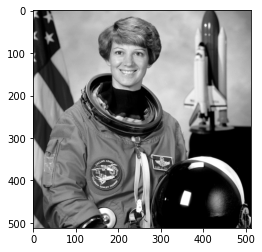

In [9]:
plt.imshow(img, cmap = "gray")

In [10]:
print(img)

[[5.83434902e-01 4.14859216e-01 2.44058431e-01 ... 4.75007843e-01
  4.58213333e-01 4.69121961e-01]
 [6.75588235e-01 5.56006667e-01 4.49052941e-01 ... 4.68548627e-01
  4.56501176e-01 4.55958431e-01]
 [7.66334902e-01 7.00524314e-01 6.49276078e-01 ... 4.76406667e-01
  4.62104314e-01 4.53978431e-01]
 ...
 [6.81696471e-01 6.81979216e-01 6.71889020e-01 ... 0.00000000e+00
  2.82745098e-04 0.00000000e+00]
 [6.74694510e-01 6.68532941e-01 6.64030196e-01 ... 2.82745098e-04
  3.92156863e-03 0.00000000e+00]
 [6.70482353e-01 6.63189804e-01 6.52838824e-01 ... 0.00000000e+00
  3.92156863e-03 0.00000000e+00]]


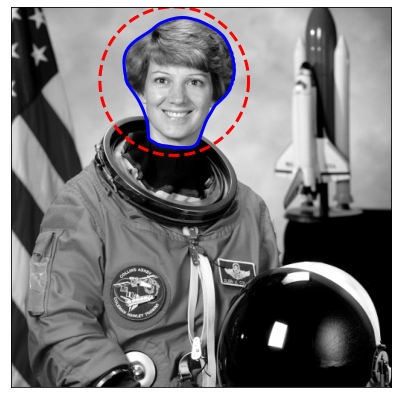

In [11]:

s = np.linspace(0, 2*np.pi, 400)
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3),
                       init, alpha=0.015, beta=10, gamma=0.001,
                       coordinates='rc')

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()